<a href="https://colab.research.google.com/github/dmakarau/LLM_explore/blob/main/GPT4_tokenizer_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# implementing all the import we need
!pip install tiktoken
import tiktoken

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import re


In [4]:
# importing ChatGPT4 tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

# Exercise **1**

In [5]:

text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text
# split by puntuation
word_info = {}
words = re.split(r'([,.:;—?_!"“()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]

tokenCount = np.zeros((len(words), 2), dtype=int)
for index, word in enumerate(words):
  tokenCount[index, 0] = len(word)
  tokenCount[index, 1] = len(tokenizer.encode(word))



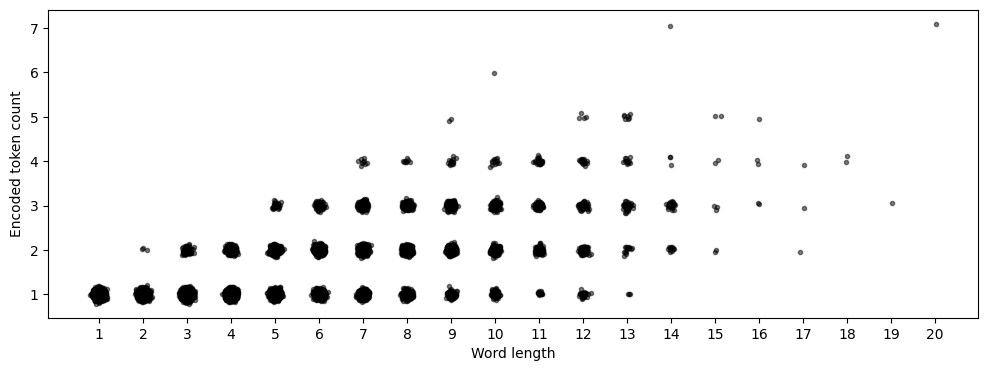

In [6]:
# visualise the token
plt.figure(figsize=(12,4))


offsetsX = np.random.randn(len(words))/20

offsetsY = np.random.randn(len(words)) / 20

plt.plot(tokenCount[:, 0] + offsetsX, tokenCount[:, 1] + offsetsY, '.k', alpha = .5)
plt.gca().set(xlabel='Word length', ylabel='Encoded token count', xticks=np.arange(1,np.max(tokenCount[:,0])+1))

plt.show()

# Exercise 2

In [7]:



# find words with characters
words_with_14_chars = set (np.where(tokenCount[:, 0] == 14)[0])
# print their tokens

for index in words_with_14_chars:
  decoded_tokens = [tokenizer.decode([token]) for token in tokenizer.encode(words[index])]
  print(f'"{words[index]}" comprises {decoded_tokens}')






"aforementioned" comprises ['a', 'fore', 'mentioned']
"constellations" comprises ['const', 'ell', 'ations']
"specialisation" comprises ['special', 'isation']
"conversational" comprises ['con', 'vers', 'ational']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
"north-eastward" comprises ['north', '-east', 'ward']
"Undergrounders" comprises ['Under', 'ground', 'ers']
"interpretation" comprises ['interpret', 'ation']
"discriminating" comprises ['disc', 'rim', 'inating']
"mountaineering" comprises ['mount', 'aine', 'ering']
"mathematicians" comprises ['math', 'ematic', 'ians']
"ill-controlled" comprises ['ill', '-controlled']
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
"North-eastward" comprises ['North', '-east', 'ward']
"interrogations" comprises ['inter', 'rog', 'ations']
"self-deception" comprises ['self', '-de', 'ception']
"differentiated" comprises ['different', 'iated']
"expostulations" comprises ['ex', 'post', 'u

## Exercise 3 Tokenizer Efficiency

A very efficient word:
 three-dimensional has 17 letters and 2 tokens
A very inefficient word:
 gynæceum’s has 10 letters and 6 tokens


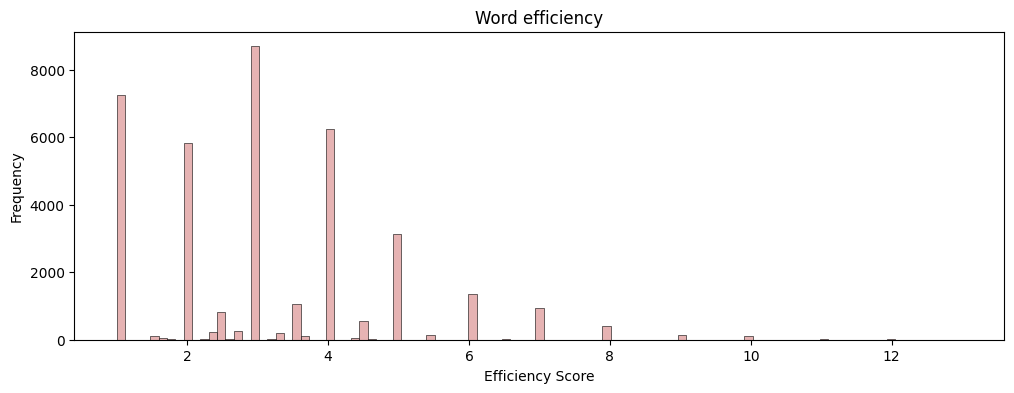

In [8]:
moreEfficient = np.where( (tokenCount[:,0] == 17) & (tokenCount[:,1] == 2))[0]
lessEfficient = np.where( (tokenCount[:,0] == 10) & (tokenCount[:,1] == 6))[0]
print(f'A very efficient word:\n {words[moreEfficient[0]]} has {tokenCount[moreEfficient][0][0]} letters and {tokenCount[moreEfficient][0][1]} tokens')
print(f'A very inefficient word:\n {words[lessEfficient[0]]} has {tokenCount[lessEfficient][0][0]} letters and {tokenCount[lessEfficient][0][1]} tokens')

# efficiency
efficiency = tokenCount[:, 0] / tokenCount[:, 1]

# show a historgram+
plt.figure(figsize=(12,4))
plt.hist(efficiency, color=[.9, .7, .7], edgecolor='k', linewidth= .4, bins='fd')
plt.gca().set(xlabel='Efficiency Score', ylabel='Frequency', title='Word efficiency')
plt.show()

In [10]:
max_efficiency = np.max(efficiency)
min_efficiency = np.min(efficiency)

# find all the workds with the max and min efficiency
most_efficient_words = np.where(efficiency == max_efficiency)[0]
less_efficient_words = np.where(efficiency == min_efficiency)[0]

most_efficient_words = list(set([ words[i] for i in most_efficient_words]))
print('MOST EFFICIENT WORDS:')
for w in most_efficient_words:
  print(f'The word "{w}" has {max_efficiency} characters per token')

less_efficient_words = list(set( words[i] for i in less_efficient_words  ))
print('LESS EFFICIENT WORDS:')
for w in less_efficient_words:
  print(f'The word "{w}" has {min_efficiency} characters per token')

MOST EFFICIENT WORDS:
The word "advertisement" has 13.0 characters per token
The word "communication" has 13.0 characters per token
LESS EFFICIENT WORDS:
The word ")" has 1.0 characters per token
The word "." has 1.0 characters per token
The word "”" has 1.0 characters per token
The word "D" has 1.0 characters per token
The word "‘I" has 1.0 characters per token
The word "_" has 1.0 characters per token
The word "…" has 1.0 characters per token
The word "V" has 1.0 characters per token
The word "?" has 1.0 characters per token
The word "]" has 1.0 characters per token
The word "H" has 1.0 characters per token
The word "G" has 1.0 characters per token
The word "X" has 1.0 characters per token
The word "—" has 1.0 characters per token
The word ":" has 1.0 characters per token
The word "I" has 1.0 characters per token
The word "," has 1.0 characters per token
The word ";" has 1.0 characters per token
The word "“" has 1.0 characters per token
The word "!" has 1.0 characters per token
The w

# Exercise 4 Tokens in separated words vs Text

In [15]:
unique_words = set(words)
print(f'The number of unique words in the text of The Time Machine is {len(unique_words)}')

The number of unique words in the text of The Time Machine is 5007


In [80]:
# get all the tokens of GPT 4
tokens = list(tokenizer._mergeable_ranks.values())

# get the first 10%
first_10_percent_tokens = tokens[: int(len(tokens) * 0.1)]


#pick a random token
random_t = np.random.randint(0, tokenizer.n_vocab//10)
print(random_t)

# found words from our word-split that contains that token
words_with_token = [ w for w in unique_words if random_t in tokenizer.encode(w)  ]

# find the context from the full encoding surrounding each token appearance
seqs_with_token = np.array(tokenizer.encode(text)) == random_t

#print the token
print(f'Token {random_t} is "{tokenizer.decode([random_t])}"\n\n')

# its occurances in the GPT encoding
print(f'*** Our manual word split: Token appears {len(words_with_token)} times, including:\n----------------')
for w in words_with_token:
  print(f'{w}')


# occurences in the GPT encoding
print(f'\n\n*** From encoding the full text: This token appears {sum(seqs_with_token)} times, including:\n----------------')
for s in np.where(seqs_with_token)[0]:
  print(f'{tokenizer.decode(np.array(tokenizer.encode(text)[s-5:s+5]))}\n-----------------')


print(words_with_token)


658
Token 658 is " el"


*** Our manual word split: Token appears 0 times, including:
----------------


*** From encoding the full text: This token appears 3 times, including:
----------------
 I left that gallery greatly elated.

“I cannot
-----------------
 that made me quick to elude him. At
-----------------
 hold of an idea that eluded him. “
-----------------
[]
